In [1]:
import pandas as pd

# Load the dataset using the relative path
data_path = '../../Meteo203-2526-Garibay/data/2009_SCIENCE_GARDEN.csv'
df = pd.read_csv(data_path)

# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            365 non-null    object 
 1   DAILY RAINFALL  359 non-null    float64
 2   TEMP MEAN       365 non-null    float64
 3   TEMP MAX        365 non-null    float64
 4   TEMP MIN        365 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.4+ KB


In [2]:
# Calculate specific statistics for the "Daily Rainfall" column
rainfall_mean = df['DAILY RAINFALL'].mean()
rainfall_median = df['DAILY RAINFALL'].median()
rainfall_min = df['DAILY RAINFALL'].min()
rainfall_max = df['DAILY RAINFALL'].max()
rainfall_SD = df['DAILY RAINFALL'].std()

print(f"Mean Rainfall: {rainfall_mean:.2f}")
print(f"Median Rainfall: {rainfall_median:.2f}")
print(f"Minimum Rainfall: {rainfall_min:.2f}")
print(f"Maximum Rainfall: {rainfall_max:.2f}")
print(f"Standard Deviation Rainfall: {rainfall_SD:.2f}")

# Calculate specific statistics for the "Temp Mean" column
mean_temp_mean = df['TEMP MEAN'].mean()
mean_temp_median = df['TEMP MEAN'].median()
mean_temp_min = df['TEMP MEAN'].min()
mean_temp_max = df['TEMP MEAN'].max()
mean_temp_SD = df['TEMP MEAN'].std()

print(f"Mean of Mean Temperature: {mean_temp_mean:.2f}")
print(f"Median Mean Temperature: {mean_temp_median:.2f}")
print(f"Minimum Mean Temperature: {mean_temp_min:.2f}")
print(f"Maximum Mean Temperature: {mean_temp_max:.2f}")
print(f"Standard Deviation Mean Temperature: {mean_temp_SD:.2f}")

# Calculate specific statistics for the "Temp Min" column
min_temp_mean = df['TEMP MIN'].mean()
min_temp_median = df['TEMP MIN'].median()
min_temp_min = df['TEMP MIN'].min()
min_temp_max = df['TEMP MIN'].max()
min_temp_SD = df['TEMP MIN'].std()

print(f"Mean of Min Temperature: {min_temp_mean:.2f}")
print(f"Median Min Temperature: {min_temp_median:.2f}")
print(f"Minimum Min Temperature: {min_temp_min:.2f}")
print(f"Maximum Min Temperature: {min_temp_max:.2f}")
print(f"Standard Deviation Min Temperature: {min_temp_SD:.2f}")

# Calculate specific statistics for the "Temp Max" column
max_temp_mean = df['TEMP MAX'].mean()
max_temp_median = df['TEMP MAX'].median()
max_temp_min = df['TEMP MAX'].min()
max_temp_max = df['TEMP MAX'].max()
max_temp_SD = df['TEMP MAX'].std()

print(f"Mean of Max Temperature: {max_temp_mean:.2f}")
print(f"Median Max Temperature: {max_temp_median:.2f}")
print(f"Minimum Max Temperature: {max_temp_min:.2f}")
print(f"Maximum Max Temperature: {max_temp_max:.2f}")
print(f"Standard Deviation Max Temperature: {max_temp_SD:.2f}")

Mean Rainfall: 11.30
Median Rainfall: 0.25
Minimum Rainfall: 0.00
Maximum Rainfall: 454.91
Standard Deviation Rainfall: 35.61
Mean of Mean Temperature: 27.04
Median Mean Temperature: 27.22
Minimum Mean Temperature: 22.28
Maximum Mean Temperature: 30.78
Standard Deviation Mean Temperature: 1.52
Mean of Min Temperature: 23.41
Median Min Temperature: 23.89
Minimum Min Temperature: 18.11
Maximum Min Temperature: 27.50
Standard Deviation Min Temperature: 1.75
Mean of Max Temperature: 31.66
Median Max Temperature: 31.89
Minimum Max Temperature: 25.50
Maximum Max Temperature: 36.50
Standard Deviation Max Temperature: 2.07


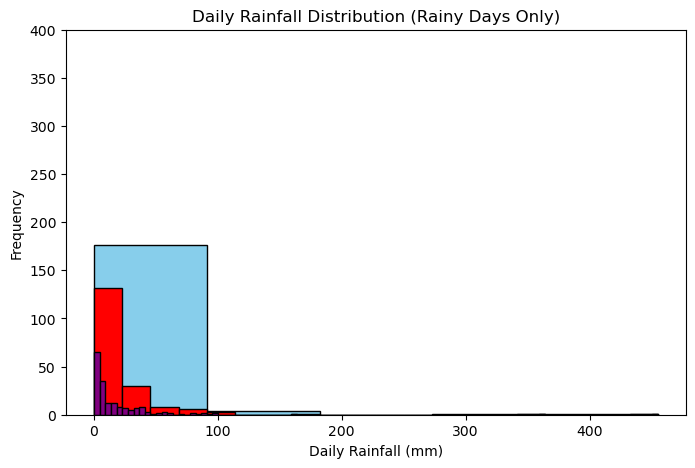

In [4]:
import matplotlib.pyplot as plt

# Create a new DataFrame that only includes days with rainfall
rainy_days_df = df[df['DAILY RAINFALL'] > 0].copy()

# Plot histogram for Daily Rainfall (rainy days only)
plt.figure(figsize=(8, 5))
plt.hist(rainy_days_df['DAILY RAINFALL'], bins=5, color='skyblue', edgecolor='black')
plt.hist(rainy_days_df['DAILY RAINFALL'], bins=20, color='red', edgecolor='black')
plt.hist(rainy_days_df['DAILY RAINFALL'], bins=100, color='purple', edgecolor='black')
plt.title('Daily Rainfall Distribution (Rainy Days Only)')
plt.xlabel('Daily Rainfall (mm)')
plt.ylabel('Frequency')
plt.ylim(0,400)
plt.show()


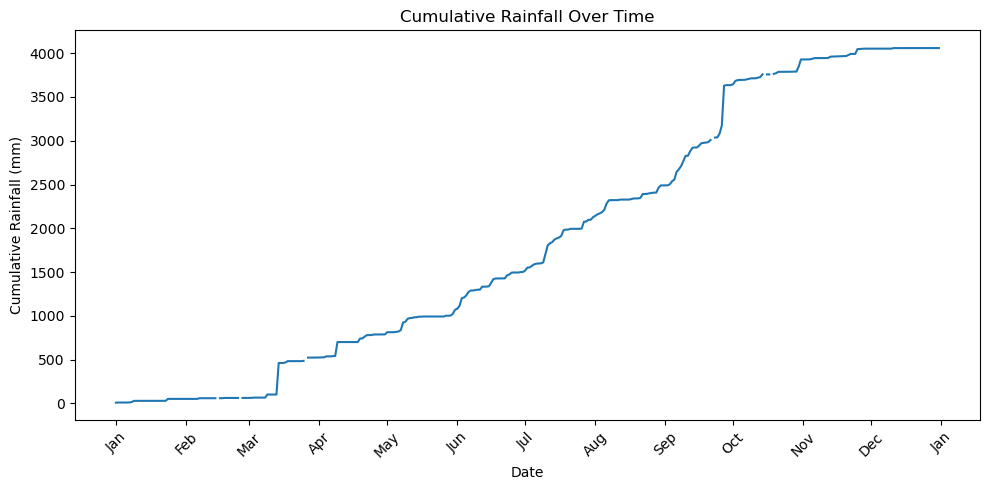

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Calculate cumulative rainfall
df['Cumulative Rainfall'] = df['DAILY RAINFALL'].cumsum()

# Plot cumulative rainfall over time with monthly x-axis ticks
plt.figure(figsize=(10, 5))
plt.plot(df['DATE'], df['Cumulative Rainfall'], color='tab:blue')
plt.title('Cumulative Rainfall Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Rainfall (mm)')

# Set x-axis to display months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as 'Month Year'

plt.xticks(rotation=45)  # Rotate labels for readability
plt.tight_layout()
plt.show()

In [9]:
print(df['Cumulative Rainfall'])

0         8.128
1         9.906
2         9.906
3         9.906
4         9.906
         ...   
360    4058.412
361    4058.412
362    4058.412
363    4058.412
364    4058.412
Name: Cumulative Rainfall, Length: 365, dtype: float64


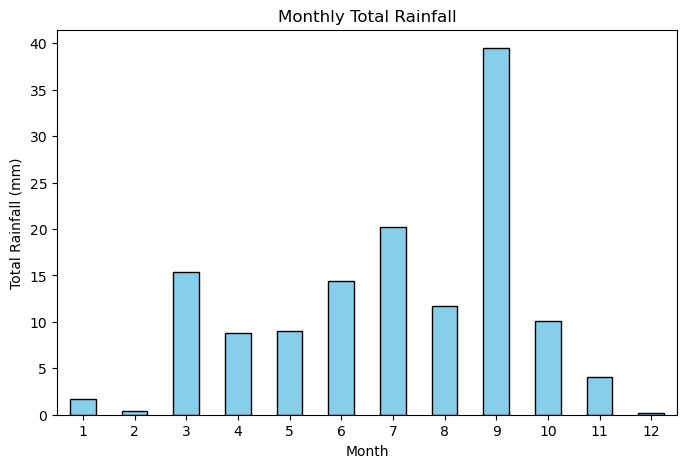

In [21]:
# Convert 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')  # 'errors=coerce' handles any invalid dates by setting them to NaT

# Add a 'Month' column based on the DATE
df['Month'] = df['DATE'].dt.month

# Calculate mean monthly rainfall
monthly_rainfall = df.groupby('Month')['DAILY RAINFALL'].mean()

# Plot mean monthly rainfall
plt.figure(figsize=(8, 5))
monthly_rainfall.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Monthly Total Rainfall")
plt.xlabel("Month")
plt.ylabel("Total Rainfall (mm)")
plt.xticks(rotation=0)
plt.show()

In [16]:
print(([monthly_rainfall]))

[Month
1      1.655097
2      0.410308
3     15.392400
4      8.813800
5      9.045677
6     14.376400
7     20.180710
8     11.757742
9     39.483862
10    10.116207
11     4.106333
12     0.221226
Name: DAILY RAINFALL, dtype: float64]


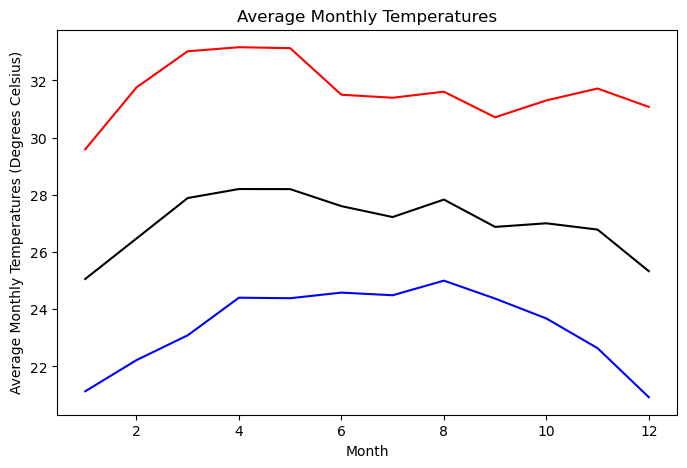

In [22]:
# Convert 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')  # 'errors=coerce' handles any invalid dates by setting them to NaT

# Add a 'Month' column based on the DATE
df['Month'] = df['DATE'].dt.month

# Calculate mean monthly temp
monthly_temp_mean = df.groupby('Month')['TEMP MEAN'].mean()
monthly_temp_min = df.groupby('Month')['TEMP MIN'].mean()
monthly_temp_max = df.groupby('Month')['TEMP MAX'].mean()

# Plot mean monthly temp
plt.figure(figsize=(8, 5))
monthly_temp_mean.plot(kind='line', color='black')
monthly_temp_min.plot(kind='line', color='blue')
monthly_temp_max.plot(kind='line', color='red')
plt.title("Average Monthly Temperatures")
plt.xlabel("Month")
plt.ylabel("Average Monthly Temperatures (Degrees Celsius)")
plt.xticks(rotation=0)
plt.show()

# Calculate min monthly temp
#monthly_temp_min = df.groupby('Month')['TEMP MIN'].mean()

# Plot min monthly temp
#plt.figure(figsize=(8, 5))
#monthly_temp_min.plot(kind='line', color='blue')
#plt.title("Average Monthly Mean Temperature")
#plt.xlabel("Month")
#plt.ylabel("Average Monthly Mean Temperature (Degrees Celsius)")
#plt.xticks(rotation=0)
#plt.show()

# Calculate max monthly temp
#monthly_temp_max = df.groupby('Month')['TEMP MAX'].mean()

# Plot max monthly temp
#plt.figure(figsize=(8, 5))
#monthly_temp_max.plot(kind='line', color='red')
#plt.title("Average Monthly Mean Temperature")
#plt.xlabel("Month")
#plt.ylabel("Average Monthly Mean Temperature (Degrees Celsius)")
#plt.xticks(rotation=0)
#plt.show()


In [23]:
print(([monthly_temp_mean]))
print(([monthly_temp_min]))
print(([monthly_temp_max]))

[Month
1     25.057348
2     26.472222
3     27.888889
4     28.203704
5     28.200717
6     27.605556
7     27.224014
8     27.835125
9     26.879630
10    27.005376
11    26.785185
12    25.329749
Name: TEMP MEAN, dtype: float64]
[Month
1     21.129032
2     22.220238
3     23.087814
4     24.403704
5     24.385305
6     24.581481
7     24.489247
8     25.000000
9     24.372222
10    23.677419
11    22.637037
12    20.922939
Name: TEMP MIN, dtype: float64]
[Month
1     29.591398
2     31.755952
3     33.021505
4     33.162963
5     33.130824
6     31.501852
7     31.396057
8     31.607527
9     30.712963
10    31.302867
11    31.718519
12    31.075269
Name: TEMP MAX, dtype: float64]
